In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn import tree



In [ ]:
from google.colab import drive

# mount your google drive
drive.mount('/content/drive')

# load dataset
df = pd.read_excel('/content/drive/MyDrive/Maternal Health Risk.xlsx',
                 names=["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate","RiskLevel"])
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,35,140,90,13.00,98.0,70,high risk
1,29,90,70,8.00,100.0,80,high risk
2,30,140,85,7.00,98.0,70,high risk
3,35,120,60,6.10,98.0,76,low risk
4,23,140,80,7.01,98.0,70,high risk
...,...,...,...,...,...,...,...
1008,22,120,60,15.00,98.0,80,high risk
1009,55,120,90,18.00,98.0,60,high risk
1010,35,85,60,19.00,98.0,86,high risk
1011,43,120,90,18.00,98.0,70,high risk


In [ ]:
X = df.iloc[:,:6]
Y = df.iloc[:,-1]

X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,35,140,90,13.00,98.0,70
1,29,90,70,8.00,100.0,80
2,30,140,85,7.00,98.0,70
3,35,120,60,6.10,98.0,76
4,23,140,80,7.01,98.0,70
...,...,...,...,...,...,...
1008,22,120,60,15.00,98.0,80
1009,55,120,90,18.00,98.0,60
1010,35,85,60,19.00,98.0,86
1011,43,120,90,18.00,98.0,70


In [ ]:
pd.DataFrame(Y)

,RiskLevel
0,high risk
1,high risk
2,high risk
3,low risk
4,high risk
...,...
1008,high risk
1009,high risk
1010,high risk
1011,high risk


In [ ]:
from sklearn.preprocessing import normalize
normalized_x = normalize(X)

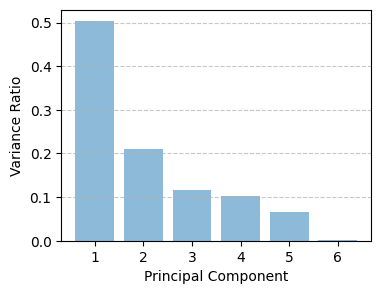

In [ ]:
# Standardize features
X_std = (normalized_x - np.mean(normalized_x, axis=0)) / np.std(normalized_x, axis=0)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate variance ratio
variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(4, 3))
plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, align='center', alpha=0.5)

plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(np.arange(1, len(variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

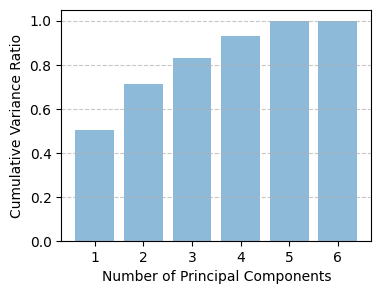

In [ ]:
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Plot principal components vs cumulative variance ratio as a bar graph
plt.figure(figsize=(4, 3))
plt.bar(range(1, len(variance_ratio) + 1), cumulative_variance_ratio, align='center', alpha=0.5)

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.xticks(np.arange(1, len(variance_ratio) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

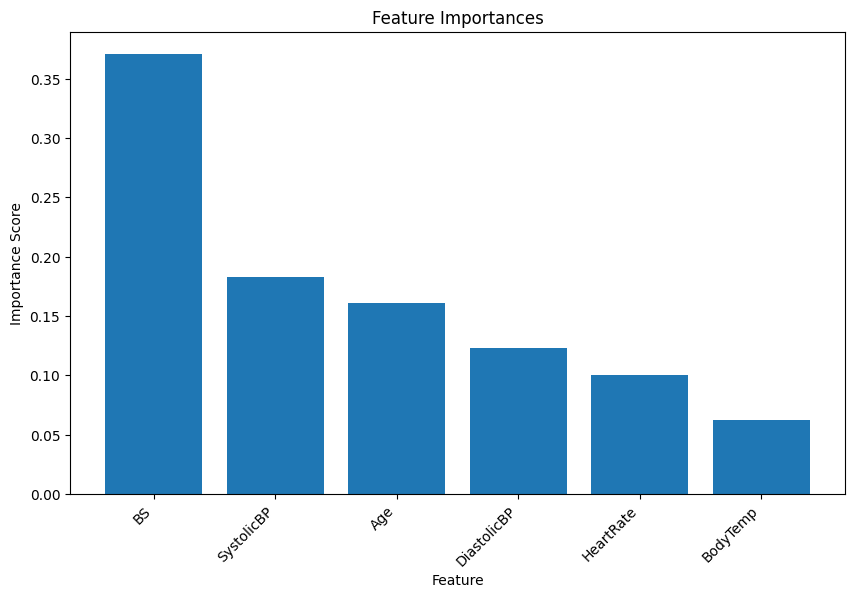

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
forest.fit(X, Y)

# Get feature importances
importances = forest.feature_importances_

# Get indices of features sorted by importance
sorted_indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate","RiskLevel"]
# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
DC=tree.DecisionTreeClassifier()

In [ ]:
DC=DC.fit(X_train,y_train)

In [ ]:
output=DC.predict(X_test)
pd.DataFrame(output)

In [ ]:
accuracy = accuracy_score(y_test, output)
print("Accuracy:", accuracy)

Accuracy: 0.8029556650246306


In [ ]:
df_output=pd.DataFrame(output)
class_names=df_output[0].unique()
#df_output[0].unique()

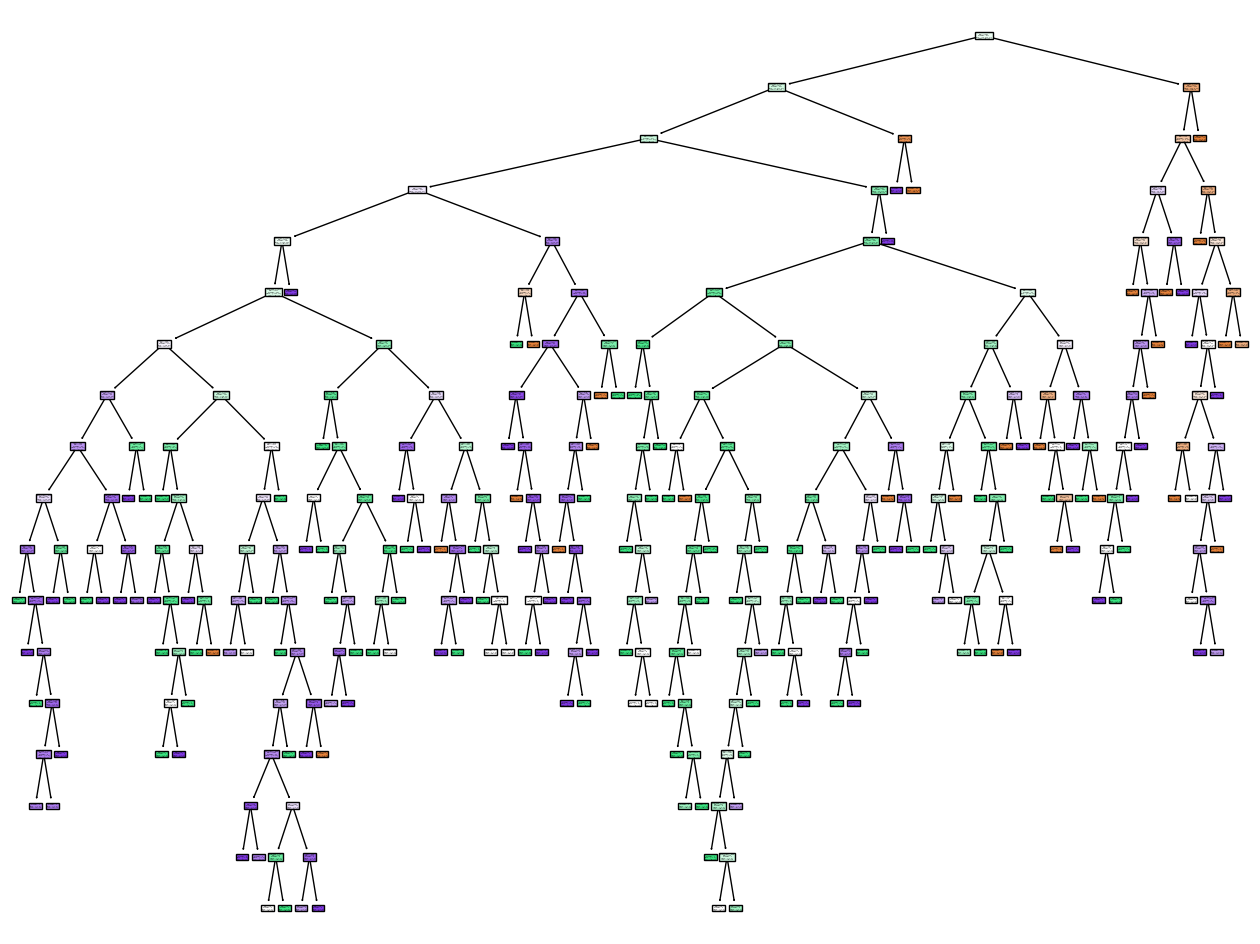

In [ ]:
fig = plt.figure(figsize=(16,12))
_ = tree.plot_tree(DC,
                   feature_names=X_test.columns,
                   class_names=class_names,
                   filled=True)

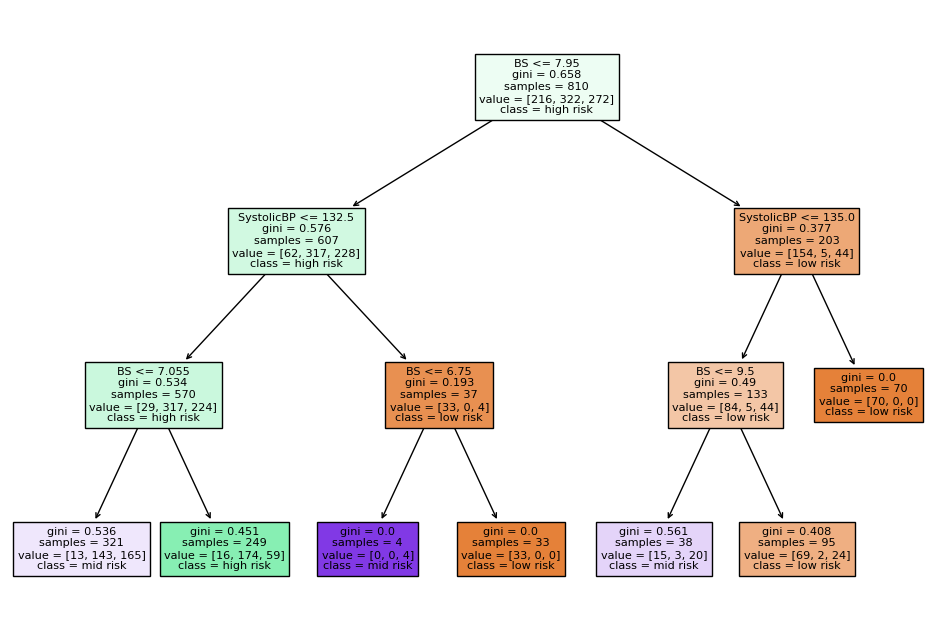

In [ ]:
# Create a decision tree with a maximum depth of 3 (adjust as needed):
DC = tree.DecisionTreeClassifier(max_depth=3)
DC = DC.fit(X_train, y_train)
# plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(12,8))

# Visualize the simplified tree:
_ = tree.plot_tree(DC, feature_names=X_test.columns, class_names=class_names, filled=True)



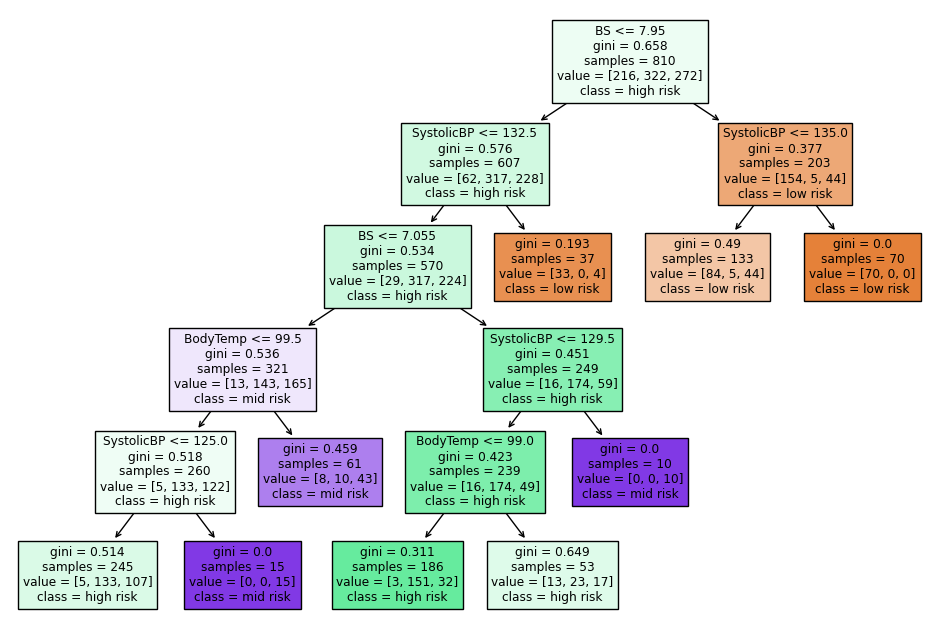

In [ ]:
# Prune the tree using cost-complexity pruning:
path = DC.cost_complexity_pruning_path(X_test, y_test)
alphas = path.ccp_alphas

# Choose an alpha value for pruning (e.g., 0.01):
alpha = 0.01

# Create a pruned tree:
pruned_tree = tree.DecisionTreeClassifier(ccp_alpha=alpha)
pruned_tree.fit(X_train, y_train)

fig = plt.figure(figsize=(12,8))

# Visualize the pruned tree:
_ = tree.plot_tree(pruned_tree, feature_names=X_test.columns, class_names=class_names, filled=True)
